In [1]:
import pyedflib
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raiz = r'''C:\Users\jonat\OneDrive\Documents\Protocolo_PKS\Protocolo_PKS\dados_edf'''
controle = r'''\controle'''
parkinson = r'''\parkinson'''

In [3]:
co = raiz + controle+ r'''\1\Antônia Perpetuo Borges - Dia 17.12.11 as 08.56.09.edf'''

In [4]:
edf = pyedflib.EdfReader(co)


In [5]:
edf.getNSamples()

array([12000, 12000, 12000, 12000])

In [6]:
signal_labels = edf.getSignalLabels()

In [7]:
n = edf.signals_in_file

In [8]:
signal_labels = edf.getSignalLabels()

In [9]:
sigbufs = np.zeros((n, edf.getNSamples()[0]))

In [10]:
sigbufs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for i in np.arange(n):
     sigbufs[i, :] = edf.readSignal(i)

In [12]:
labels =['Ch 1', 'Ch 2', 'Ch 3', 'Ch 4']

In [13]:
df = pd.DataFrame(sigbufs.T, columns=labels, )

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

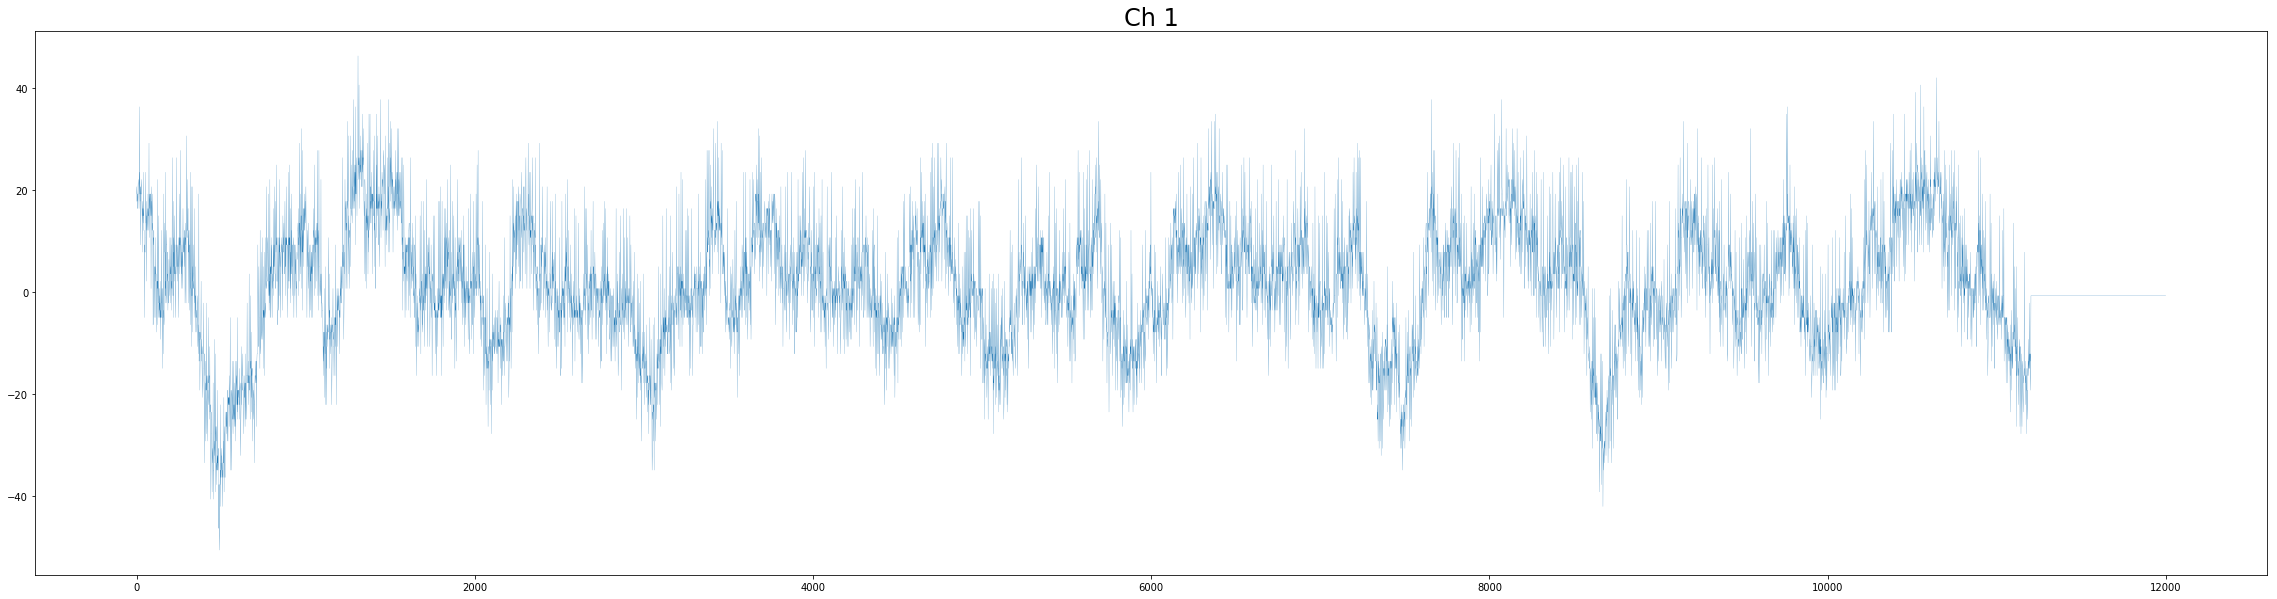

In [15]:
plt.figure(figsize=(40,10))
plt.title('Ch 1',fontsize=24)
plt.plot(df['Ch 1'], linewidth=0.2)

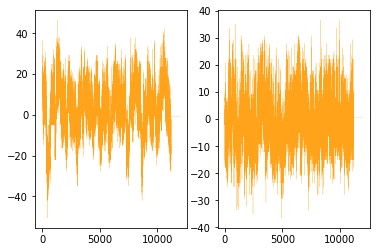

In [16]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df['Ch 1'], linewidth=0.2, color='#ffa31a')

plt.subplot(1, 2, 2)
plt.plot(df['Ch 2'], linewidth=0.2, color='#ffa31a')

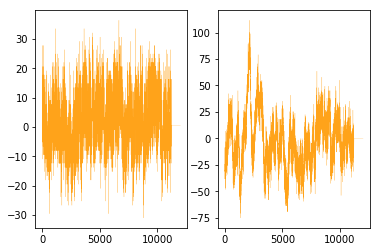

In [17]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(df['Ch 3'], linewidth=0.2, color='#ffa31a')

plt.subplot(1, 2, 2)
plt.plot(df['Ch 4'], linewidth=0.2, color='#ffa31a')

edf._close()
del edf

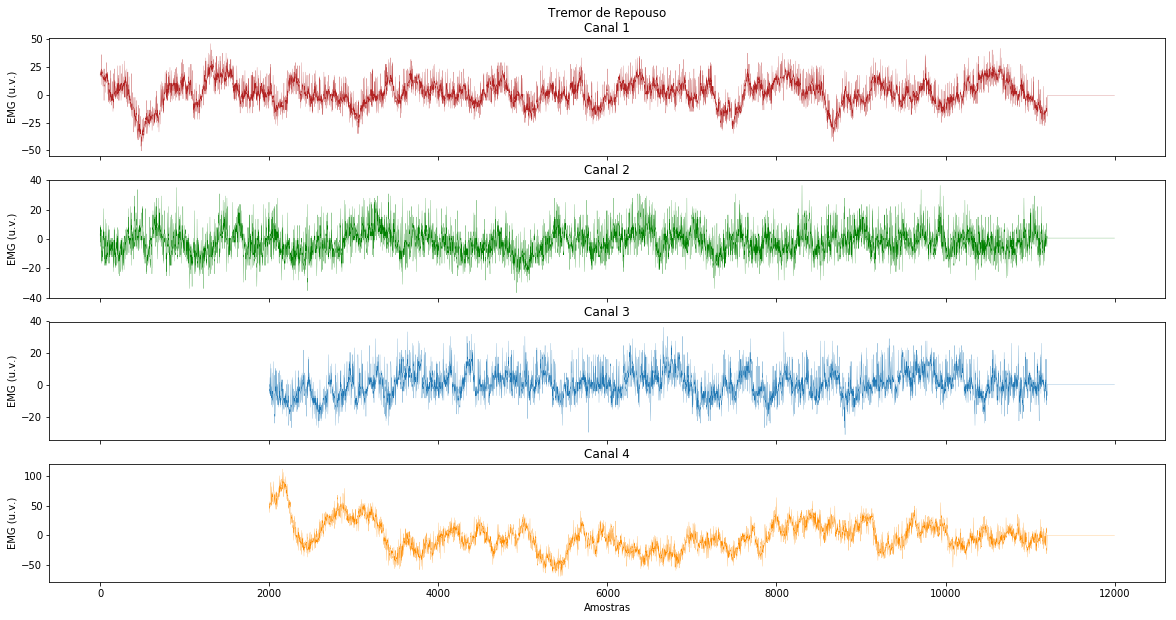

<Figure size 2880x1440 with 0 Axes>

In [19]:
def plotar(df):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
    
    plt.figure(figsize=(40,20))
    ax1.plot(df['Ch 1'], linewidth=0.2, color = '#B22222')
    ax1.set_title('Tremor de Repouso'+'\nCanal 1')
    ax1.set_ylabel('EMG (u.v.)')

    ax2.plot(df['Ch 2'], linewidth=0.2, color = '#008000')
    ax2.set_title('\nCanal 2')
    ax2.set_ylabel('EMG (u.v.)')
    
    ax3.plot(df['Ch 3'][2000:], linewidth=0.2)
    ax3.set_title('\nCanal 3')
    ax3.set_ylabel('EMG (u.v.)')

    ax4.plot(df['Ch 4'][2000:], linewidth=0.2, color = '#FF8C00')
    ax4.set_title('\nCanal 4')
    ax4.set_ylabel('EMG (u.v.)')
    ax4.set_xlabel('Amostras')
    
    f.set_size_inches(w=20,h=10)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plotar(df)